In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

log_dir = os.path.join("./logs","Sequential")
os.makedirs(log_dir, exist_ok=True)

In [2]:
tf.__version__

'2.0.0'

# Get the data

In [4]:
# fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
print('x_train_full', type(x_train_full), x_train_full.shape, x_train_full.dtype)
print('y_train_full', type(y_train_full), y_train_full.shape, y_train_full.dtype)

x_train_full <class 'numpy.ndarray'> (60000, 28, 28) uint8
y_train_full <class 'numpy.ndarray'> (60000,) uint8


Rescale the pixels' values between 0 and 1.. 

In [7]:
x_train_full, x_test = x_train_full/255., x_test/255.

..define a map between labels and integers..

In [8]:
labels_map = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
display(*enumerate(labels_map))

(0, 'T-shirt/top')

(1, 'Trouser')

(2, 'Pullover')

(3, 'Dress')

(4, 'Coat')

(5, 'Sandal')

(6, 'Shirt')

(7, 'Sneaker')

(8, 'Bag')

(9, 'Ankle boot')

and split the full training set in training and validation sets.

In [9]:
x_train, x_val,  y_train, y_val  = train_test_split(x_train_full, y_train_full, test_size=5000)

In [10]:
print('Train:', x_train.shape, x_train.dtype, y_train.shape, y_train.dtype)
print('Valid:', x_val.shape, x_val.dtype, y_val.shape, y_val.dtype)
print('Test :', x_test.shape, x_test.dtype, y_test.shape, y_test.dtype)

Train: (55000, 28, 28) float64 (55000,) uint8
Valid: (5000, 28, 28) float64 (5000,) uint8
Test : (10000, 28, 28) float64 (10000,) uint8


Let's check some of the data

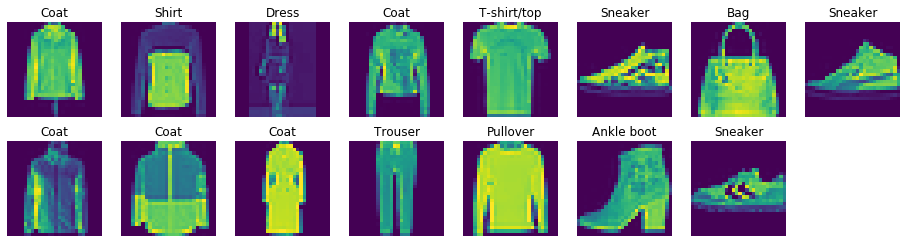

In [11]:
def display_gallery(images, labels, n_rows=2):
    fig = plt.figure(figsize=(16,2*n_rows))
    for i, (x, y) in enumerate(zip(images, labels)):
        ax = fig.add_subplot(n_rows, np.ceil(len(images)/n_rows), i + 1)
        plt.imshow(x)
        plt.axis('off')
        ax.set_title(y)
    plt.show()

display_gallery(x_train[:15], labels_map[y_train[:15]])

# Define the model

As first model we will use a simple DNN: a Multy Layer Perceptron.

In [13]:
from tensorflow.keras.layers import Flatten, Dense, Input
MLP = tf.keras.models.Sequential([
        Input(shape=(28, 28)),
        Flatten(),
        Dense(100, activation="relu"),
        Dense(50, activation="relu"),
        Dense(10,activation="softmax")
])

### Display the model architecture

In [14]:
MLP.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [15]:
print('MLP.input_shape :', MLP.input_shape)
print('MLP.output_shape:', MLP.output_shape)

MLP.input_shape : (None, 28, 28)
MLP.output_shape: (None, 10)


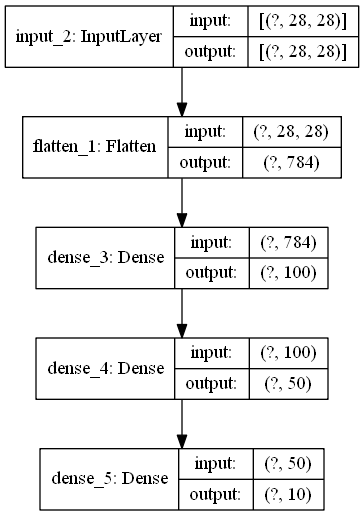

In [16]:
tf.keras.utils.plot_model(MLP, show_shapes=True)

### Access the layers

In [20]:
MLP.layers

In [21]:
for i,l in enumerate(MLP.layers):
    print('Layer %d name: %s'%(i, l.name))

Layer 0 name: flatten_1
Layer 1 name: dense_3
Layer 2 name: dense_4
Layer 3 name: dense_5


In [24]:
hidden_layer = MLP.get_layer('dense_4')
hidden_layer is MLP.layers[2]

True

### Get / set weights
We can even play around with the weights but... usually it is not a good idea!

In [25]:
w, b = hidden_layer.get_weights()
print(type(w), w.shape)
display(w.round(2))
print(type(b), b.shape)
display(b.round(2))

<class 'numpy.ndarray'> (100, 50)


array([[-0.08, -0.01, -0.01, ..., -0.08, -0.05, -0.  ],
       [ 0.06,  0.14, -0.04, ..., -0.01, -0.14,  0.16],
       [ 0.03, -0.2 , -0.19, ..., -0.14, -0.09,  0.02],
       ...,
       [-0.16,  0.01, -0.2 , ...,  0.19,  0.11,  0.19],
       [-0.17, -0.07,  0.07, ..., -0.11, -0.06, -0.04],
       [-0.09,  0.12, -0.14, ..., -0.14, -0.09,  0.18]], dtype=float32)

<class 'numpy.ndarray'> (50,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [27]:
# Optional
hidden_layer.set_weights((w, np.ones_like(b)))

# Use the model

In [32]:
i = 0
# Wrong:
# tnsr_out = MLP(x_train[i]) # what's wrong here?
# Fix: you need to use the Tensor type and meet the shape
tnsr_out = MLP(x_train[[i]]) 
# x_train[[i]]: shape: (1,28,28). List of one element
display(tnsr_out)

<tf.Tensor: id=252, shape=(1, 10), dtype=float32, numpy=
array([[0.5790221 , 0.05227858, 0.00250208, 0.1252205 , 0.00437383,
        0.00857865, 0.01520781, 0.07948454, 0.05197016, 0.08136179]],
      dtype=float32)>

The net has not been trained yet

In [34]:
# The vector are the probabilities
y_prob = tnsr_out.numpy()
display(y_prob.round(2))
y_pred = np.argmax(y_prob)
print('Predicted : %d'%y_pred)
print('True Label: %d'%y_train[i])
print('\n:%s'%(')' if y_pred == y_train[i] else '\'('))

array([[0.58, 0.05, 0.  , 0.13, 0.  , 0.01, 0.02, 0.08, 0.05, 0.08]],
      dtype=float32)

Predicted : 0
True Label: 4

:'(


# Maybe we should train it...
### Compile the model 
Before training we should specify the loss function and the optimizer to use.
Check the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)!

In [37]:
MLP.compile(loss='sparse_categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy']
            )

Output: probabilities

- Binary: classification -> binary cross_entropy. It penalties the low probabilities
- Multi-class classfication: categorical cross_entropy.

### Train
Specify training data, number of epochs, batch size, validation data, etc ...

In [36]:
history = MLP.fit(x=x_train, y=y_train, batch_size=16, epochs=15, validation_data=(x_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 7s 131us/sample - loss: 0.6031 - accuracy: 0.7890 - val_loss: 0.4693 - val_accuracy: 0.8362
Epoch 2/15
55000/55000 [==============================] - 7s 121us/sample - loss: 0.4469 - accuracy: 0.8415 - val_loss: 0.4217 - val_accuracy: 0.8556
Epoch 3/15
55000/55000 [==============================] - 7s 122us/sample - loss: 0.4062 - accuracy: 0.8550 - val_loss: 0.4017 - val_accuracy: 0.8548
Epoch 4/15
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3819 - accuracy: 0.8630 - val_loss: 0.3846 - val_accuracy: 0.8610
Epoch 5/15
55000/55000 [==============================] - 7s 120us/sample - loss: 0.3630 - accuracy: 0.8688 - val_loss: 0.3836 - val_accuracy: 0.8630
Epoch 6/15
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3485 - accuracy: 0.8743 - val_loss: 0.3661 - val_accuracy: 0.8660
Epoch 7/15
55000/55000 [===========================

### Visualise the training history
The `fit` method return a `History` object. Its `History.history` attribute is a record of training loss values and metrics values at successive epochs.

Text(0.5, 0, 'Epoch')

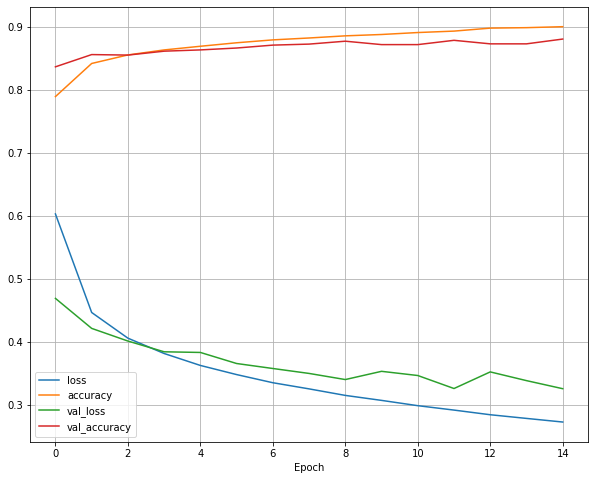

In [38]:
plt.figure(figsize=(10,8))
for k, v in history.history.items():
    plt.plot(v, label=k)
plt.legend()
plt.grid()
plt.xlabel('Epoch')

# Evaluate generalisation error
The very last thing to do. After this no more tuning, accept the result as it is.

In [39]:
test_loss, test_acc = MLP.evaluate(x_test, y_test)
print("Test loss    : %.3f"%test_loss)
print("Test accuracy: %.3f"%test_acc)
print("Generalisation error: %.3f"%(1-test_acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss    : 0.349
Test accuracy: 0.876
Generalisation error: 0.124


# Save & Load a model

In [42]:
MLP.save(os.path.join(log_dir,"MLP.h5"))

In [43]:
del MLP

In [44]:
new_model = tf.keras.models.load_model(os.path.join(log_dir,"MLP.h5"))
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


# Make predictions
Suppose to have new data `X`, we want to use the model to predict the labels (in this case we will just reuse some images from the test set).

In [45]:
X = x_test[:20]

 We can use the model's `predict` method..

In [46]:
y_prob = new_model.predict(X)

In [48]:
print(type(y_prob), y_prob.shape)
print(y_prob[0].round(4))
y_pred = np.argmax(y_prob, axis=1)
print(y_pred)

<class 'numpy.ndarray'> (20, 10)
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.160e-02 0.000e+00
 2.710e-02 5.000e-04 9.608e-01]
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]


.. or by calling the model directly.

In [49]:
out_tnsr = new_model(X)

In [50]:
print(type(out_tnsr), out_tnsr.shape)
y_prob = out_tnsr.numpy()
y_pred = np.argmax(y_prob, axis=1)

<class 'tensorflow.python.framework.ops.EagerTensor'> (20, 10)


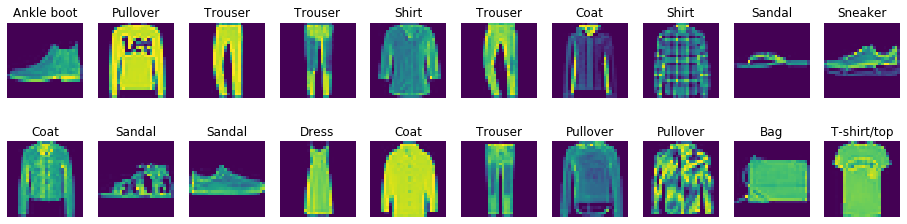

In [51]:
display_gallery(X, labels_map[y_pred])